Link to dataset on Kaggle: https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset

Step 1 Responses:

Dataset Description: This dataset provides information about retail transactions and their costs, customer demographics, etc. It is suitable for market basket analysis and customer segmentation.

Target Variable Analysis: The target variable is 'Total_Cost', which is the total cost of each transaction.

Prediction Goal: Build a regression model to predict 'Total_Cost' and understand the various factors that influence transaction costs.

Missing Values:

Transaction_ID       0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64



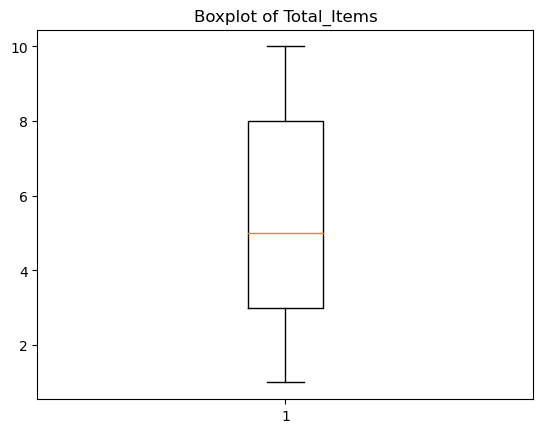

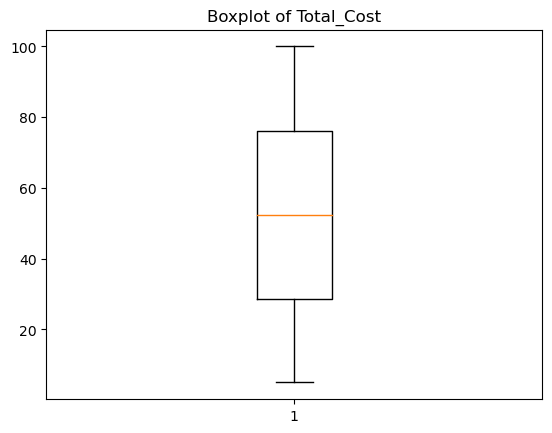

ANOVA P-Values for Numeric Columns:
       Feature   P-Value
0  Total_Items  0.775471
1   Total_Cost  1.000000
Highly Correlated Feature Pairs:
[]

Step 3 Responses:

There were not variables with zero to little variance. No highly-correlated Features were discovered.

Using standardized data would be recommended for this dataset, as it is best suited for varying scales and units contaitned in a dataset.

Some categorical variables were transformed into dummy variables.

R-squared Score: -0.04235421739470757 , Rounded to -0.0424

Step 4 Responses:

train_test_split was used to validate the result.

I chose to use RandomForestRegressor for this particular dataset, mainly because it predicts a continuous numerical value. That is useful in this case to predict our target variable, which is the total cost of retail transactions.

I used the R-squared (R2) score to evaluate the prediction model's performance.

The R-squared score was low in this case (-0.0424), meaning the model's predictio

In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor  # I chose this algorithm specifically as it was a good fit for this regression prediction,
                                                    # providing individual predictions for each tree in the ensemble

print("Link to dataset on Kaggle: https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset")
print()

# import and load data
dataset = 'Retail_Transactions_Dataset.csv'
df = pd.read_csv(dataset)

# print(df.columns)

# Step 1

print("Step 1 Responses:")
print()
print("Dataset Description: This dataset provides information about retail transactions and their costs, customer demographics, etc. It is suitable for market basket analysis and customer segmentation.")
print()
print("Target Variable Analysis: The target variable is 'Total_Cost', which is the total cost of each transaction.")
print()
print("Prediction Goal: Build a regression model to predict 'Total_Cost' and understand the various factors that influence transaction costs.")
print()


# Step 2

# drop Customer_Name, Date, Product columns. These are unnecessary for the report
unwanted_columns = ["Customer_Name", "Date", "Product"]
df = df.drop(unwanted_columns, axis=1)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print()
print(missing_values) 
print()

# remove duplicates
df = df.drop_duplicates()


# boxplots to identify outliers for numeric columns
numeric_columns = ["Total_Items", "Total_Cost"] 

for column in numeric_columns:
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    
# define numeric and categorical columns
numeric_columns = ["Total_Items", "Total_Cost"]
categorical_columns = ["Payment_Method", "City", "Store_Type", "Discount_Applied", "Customer_Category", "Season", "Promotion"]

# dummy columns
df = pd.get_dummies(df, columns = categorical_columns)


# Step 3

# feature selection for numeric columns using ANOVA
X_numeric = df[numeric_columns].values
y_numeric = df['Total_Cost'].values

# get scores and p-values
scores_numeric = selector_numeric.scores_
p_values_numeric = selector_numeric.pvalues_

# Chi-squared
selector_numeric = SelectKBest(score_func = f_regression, k = 'all')
selector_numeric.fit(X_numeric, y_numeric)

# get p-values
p_values_numeric = selector_numeric.pvalues_

# make dataframe to analyze p-values for the numeric columns
anova_p_values = pd.DataFrame({'Feature': numeric_columns, 'P-Value': p_values_numeric})
print("ANOVA P-Values for Numeric Columns:")
print(anova_p_values)

# find highly-correlated Features
threshold = 0.7  # Adjust the threshold as needed
highly_correlated_features = []
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_features.append((numeric_columns[i], numeric_columns[j]))

print("Highly Correlated Feature Pairs:")
print(highly_correlated_features)
print()

print("Step 3 Responses:")
print()
print("There were not variables with zero to little variance. No highly-correlated Features were discovered.")
print()
print("Using standardized data would be recommended for this dataset, as it is best suited for varying scales and units contaitned in a dataset.")
print()
print("Some categorical variables were transformed into dummy variables.")
print()


# Step 4

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor  

X = df.drop("Total_Cost", axis = 1)
y = df["Total_Cost"]

# train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model = RandomForestRegressor(n_estimators = 100, random_state = 10)
model.fit(X_train, y_train)

# predictions on the test data
y_pred = model.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2, ", Rounded to -0.0424")
print()

print("Step 4 Responses:")
print()
print("train_test_split was used to validate the result.")
print()
print("I chose to use RandomForestRegressor for this particular dataset, mainly because it predicts a continuous numerical value. That is useful in this case to predict our target variable, which is the total cost of retail transactions.")
print()
print("I used the R-squared (R2) score to evaluate the prediction model's performance.")
print()
print("The R-squared score was low in this case (-0.0424), meaning the model's predictions do not fit the dataset that well. Multiple things could explain this, however, it is simply likely that this model might not have been the best choice for this dataset. However, the presence of nonlinear relationships in the data could explain this as well, as the linear regression model would not capture that.")

In [ ]:
#impo